In [81]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, cross_val_score

from cycler import cycler

import statsmodels.api as sm

In [82]:
train = pd.read_csv('../cleaned_datasets/train.csv')
test = pd.read_csv('../cleaned_datasets/test.csv')




In [83]:
X = train.drop(columns='saleprice')
y = train['saleprice']
X.drop(columns = ['index'], inplace = True)

***
## Linear Regression With Cross Val and Log of Saleprice for Training
***

In [84]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
high_p_vals = list(model.pvalues[model.pvalues >= .05].index)[2:]
X.drop(columns = high_p_vals, inplace = True)
X.drop(columns = 'const', inplace = True)



C:\Users\Zachary\.conda\envs\dsi\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\Zachary\.conda\envs\dsi\lib\site-packages\statsmodels\base\model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\Zachary\.conda\envs\dsi\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\Zachary\.conda\envs\dsi\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\Zachary\.conda\envs\dsi\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [85]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
high_p_vals = list(model.pvalues[model.pvalues >= .05].index)[2:]
X.drop(columns = high_p_vals, inplace = True)
X.drop(columns = 'const', inplace = True)


In [86]:
features = list(X.columns)

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)


In [88]:
lr = LinearRegression()

y_train_log = y_train.map(np.log)
y_test_log = y_test.map(np.log)



print(cross_val_score(lr, X_train, y_train_log, cv=5).mean()
)

lr.fit(X_train, y_train_log)

print(lr.score(X_train, y_train_log), lr.score(X_test, y_test_log)
)



0.7671688919926848
0.9097015673269399 0.8895552041402066


In [89]:
lr.fit(X, y.map(np.log))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [90]:
coefficients = list(zip(X.columns, np.exp(lr.coef_)))

coef_df = pd.DataFrame(coefficients)

coefficients = dict(coefficients)



In [91]:
# doing some dumb things because matplotlib sucks


# for key, value in coefficients.items():
#     print(f"{key}_contributions = X['{key}'] * {value}")
    
    
# for i, key in enumerate(coefficients.keys()):
    
#     print(f"pd{i +1} = plt.bar(ind, {key}_contributions, bottom = {temp}_contributions)")
#     temp = key


# for i, key in enumerate(coefficients.keys()):
    
#     print(f"'{key}',")

In [92]:

id_contributions = X['id'] * 1.0000054215143441

# id_contributions

rand_colors = 'DEEEB7	966673	D2D416	3CA60D	BE4EF7	0C6EA1	648CAF	081DC2	40FE6F	C2E00D	81AE05	06A835	83D91A	C5AB31	BF3904	785275	87B20E	782523	FF89BB	A6BE0B	2848BB	D33953	8DCA2E	D2E5C9	170C51 88AC05	7E8B8E	E0BBBE	A818ED	2F42CA	442E03	381C49	A3A5E5	48D51C	23C769	1AD39E	7C788B	23ED8C	2D5026	C599C0	2EAF14	E90529	14DF15	C42145	81A2B7	2D5CD7	0B0112	B27829	EFD102	6941BF 9DCFAA	6A67C7	A8A11D	BFC91D	B860A1	03ED28	793D00	5A8FC9	C7980B	5C3CDD	DD1CA4	42D8FE	849145	B0D59E	0FB3B8	186250	692422	3B6CCA	27BFD5	ED491F	22885D'

rand_colors = rand_colors.split()



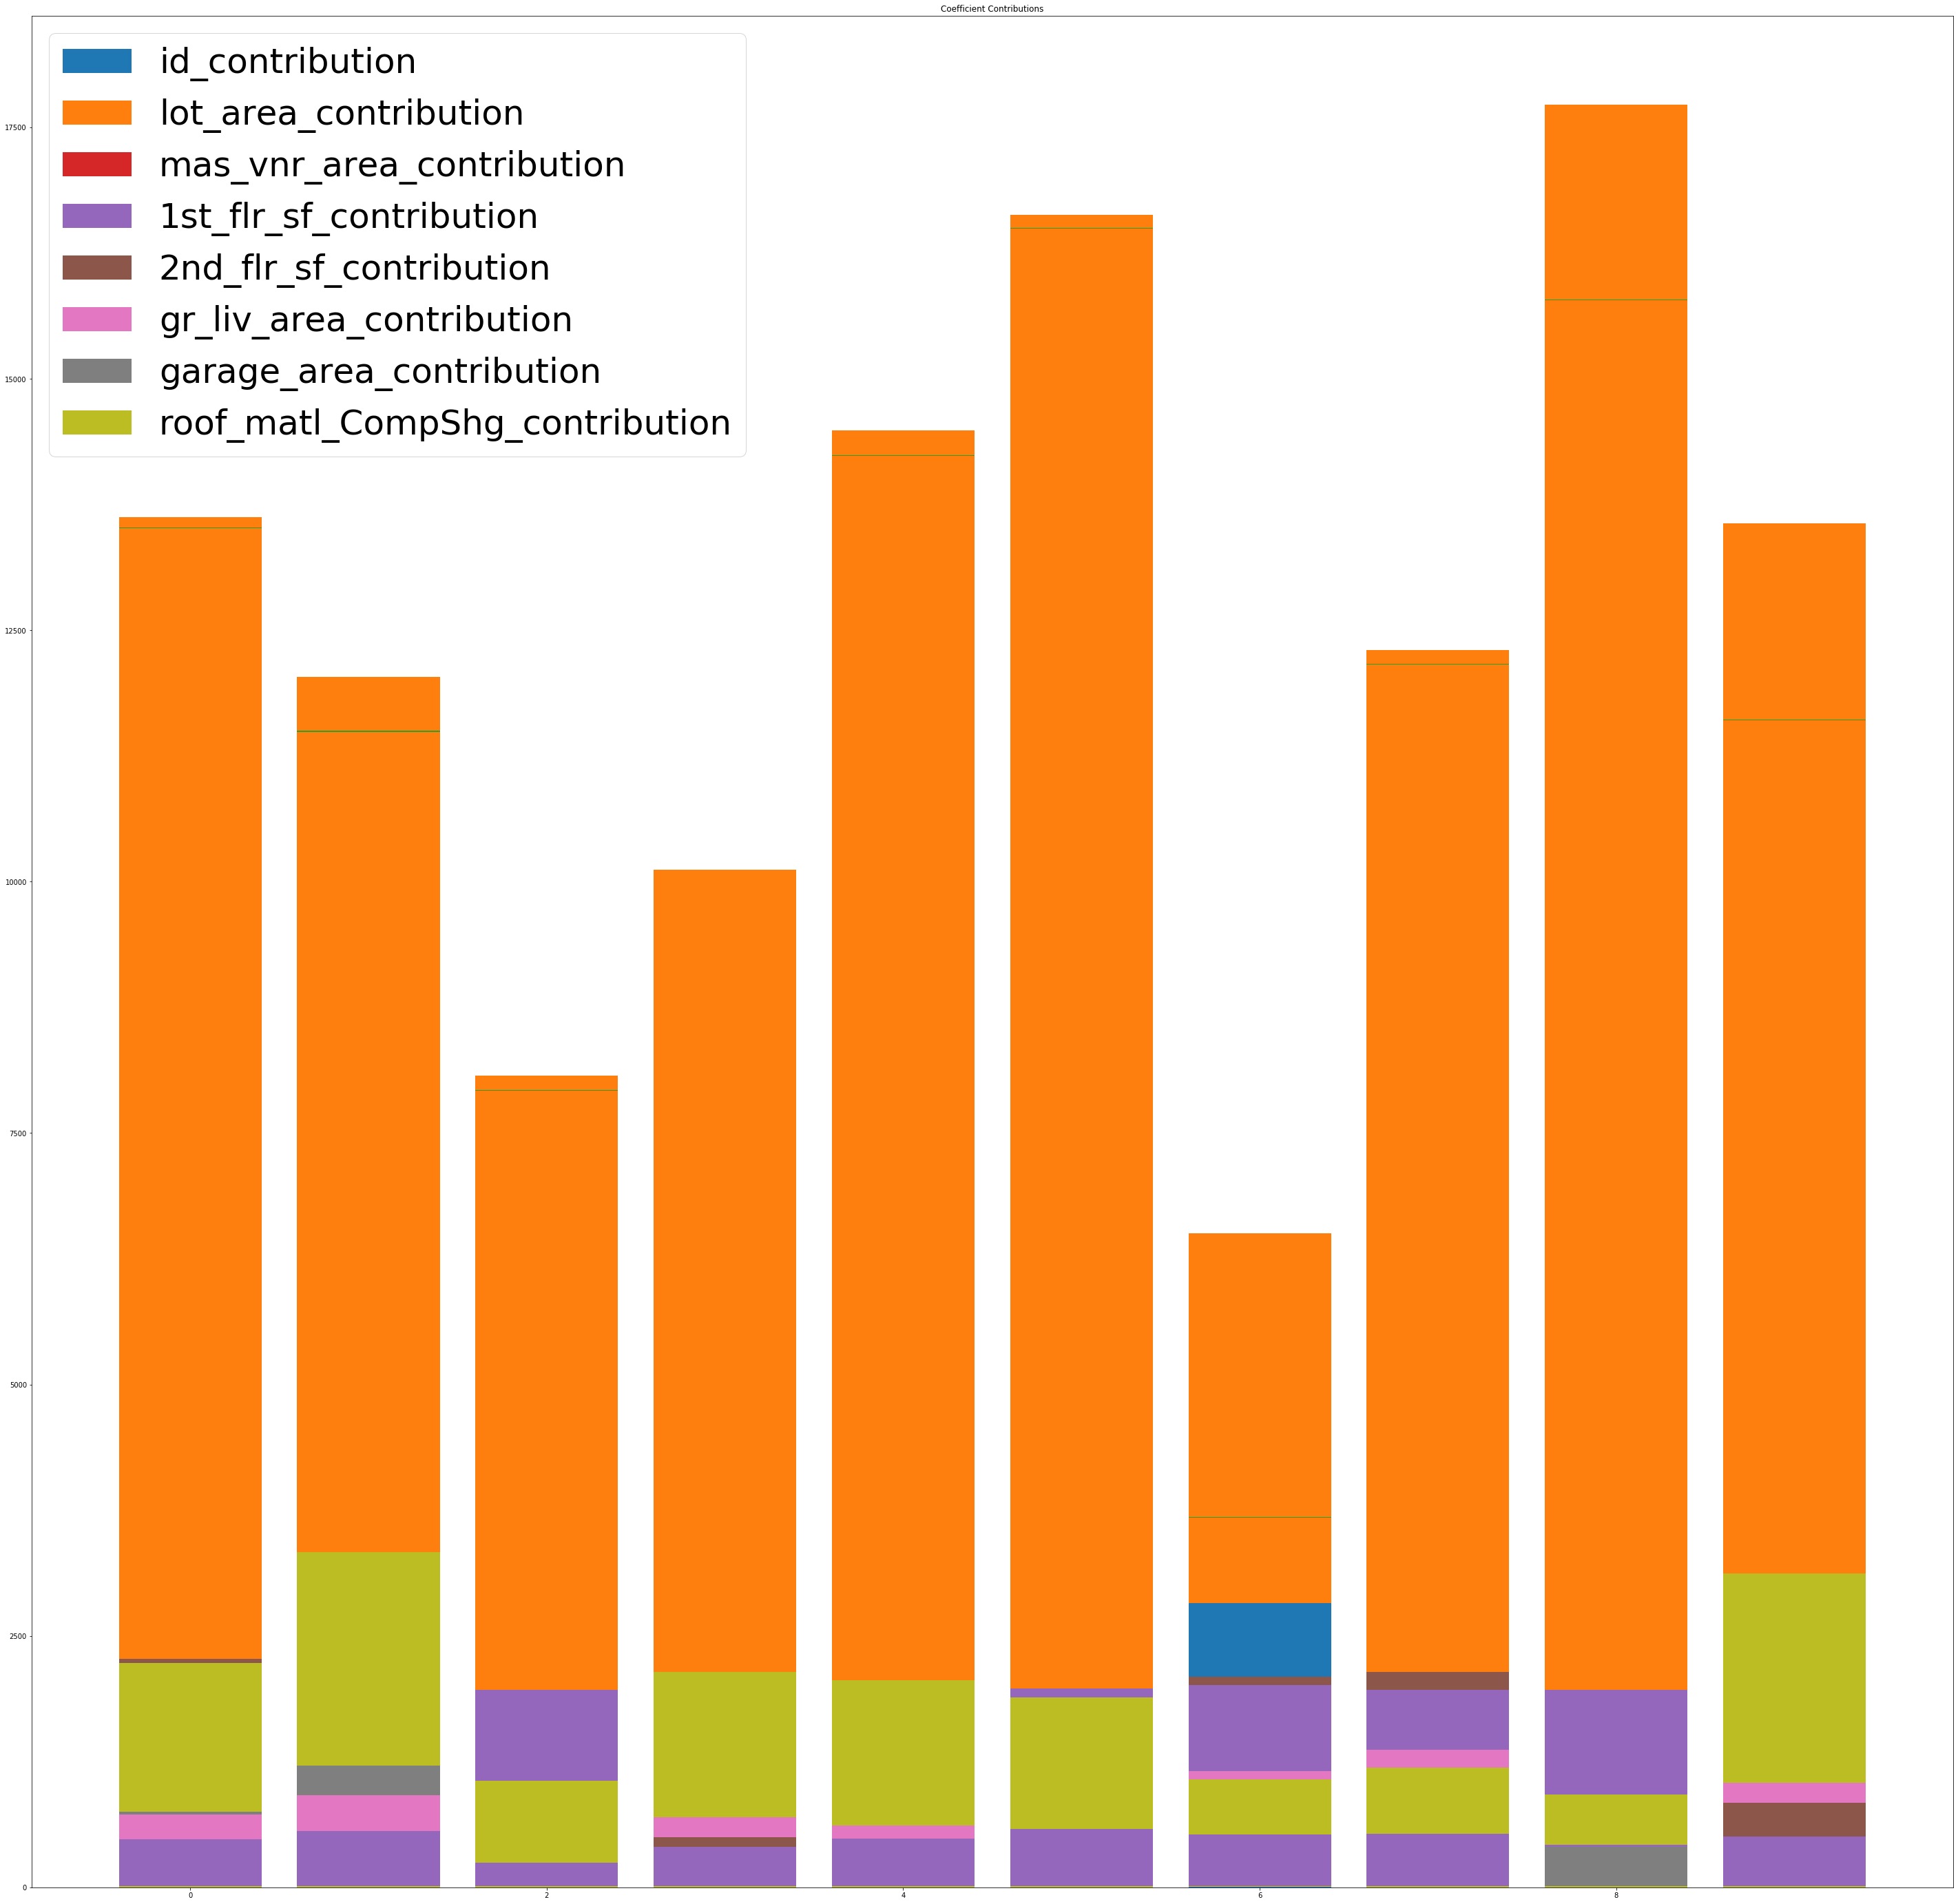

In [93]:



row_count = 10


id_contributions = X['id'][:row_count] * 1.0000054215143441
lot_area_contributions = X['lot_area'][:row_count] * 1.0000028628378088
overall_qual_contributions = X['overall_qual'][:row_count] * 1.0695265637447813
overall_cond_contributions = X['overall_cond'][:row_count] * 1.0513636565118043
year_built_contributions = X['year_built'][:row_count] * 1.0030759744269557
mas_vnr_area_contributions = X['mas_vnr_area'][:row_count] * 1.0000008082530087
x1st_flr_sf_contributions = X['1st_flr_sf'][:row_count] * 1.0001497994010304
x2nd_flr_sf_contributions = X['2nd_flr_sf'][:row_count] * 1.0000493290069268
gr_liv_area_contributions = X['gr_liv_area'][:row_count] * 1.0002042860435696
bsmt_full_bath_contributions = X['bsmt_full_bath'][:row_count] * 1.0695426291834214
full_bath_contributions = X['full_bath'][:row_count] * 1.0274053248139188
bedroom_abvgr_contributions = X['bedroom_abvgr'][:row_count] * 1.0033918033974147
kitchen_abvgr_contributions = X['kitchen_abvgr'][:row_count] * 0.9177645905834315
fireplaces_contributions = X['fireplaces'][:row_count] * 1.036248440558067
garage_area_contributions = X['garage_area'][:row_count] * 1.0000902717780413
wood_deck_sf_contributions = X['wood_deck_sf'][:row_count] * 1.0000523761810047
screen_porch_contributions = X['screen_porch'][:row_count] * 1.000307647716331
misc_val_contributions = X['misc_val'][:row_count] * 0.9999128810377511
land_contour_HLS_contributions = X['land_contour_HLS'][:row_count] * 1.0412961116893473
lot_config_CulDSac_contributions = X['lot_config_CulDSac'][:row_count] * 1.0133420720846706
neighborhood_CollgCr_contributions = X['neighborhood_CollgCr'][:row_count] * 0.9752969399778966
neighborhood_Edwards_contributions = X['neighborhood_Edwards'][:row_count] * 0.93248973960596
neighborhood_Gilbert_contributions = X['neighborhood_Gilbert'][:row_count] * 0.9684995673162088
neighborhood_GrnHill_contributions = X['neighborhood_GrnHill'][:row_count] * 1.5692742170065275
neighborhood_Mitchel_contributions = X['neighborhood_Mitchel'][:row_count] * 0.9961264538407713
neighborhood_NAmes_contributions = X['neighborhood_NAmes'][:row_count] * 0.994701968930208
neighborhood_NWAmes_contributions = X['neighborhood_NWAmes'][:row_count] * 0.9494597583066501
neighborhood_NoRidge_contributions = X['neighborhood_NoRidge'][:row_count] * 1.0009777857394742
neighborhood_NridgHt_contributions = X['neighborhood_NridgHt'][:row_count] * 1.058106641376003
neighborhood_OldTown_contributions = X['neighborhood_OldTown'][:row_count] * 0.9532602511809969
neighborhood_Sawyer_contributions = X['neighborhood_Sawyer'][:row_count] * 0.9930829622431958
neighborhood_SawyerW_contributions = X['neighborhood_SawyerW'][:row_count] * 0.9520188499897536
neighborhood_StoneBr_contributions = X['neighborhood_StoneBr'][:row_count] * 1.0439427591077681
condition_1_Norm_contributions = X['condition_1_Norm'][:row_count] * 1.0555041251386463
condition_1_PosA_contributions = X['condition_1_PosA'][:row_count] * 1.0870187655871897
condition_1_PosN_contributions = X['condition_1_PosN'][:row_count] * 1.0870244692431588
bldg_type_Twnhs_contributions = X['bldg_type_Twnhs'][:row_count] * 0.852913729751832
bldg_type_TwnhsE_contributions = X['bldg_type_TwnhsE'][:row_count] * 0.9326006043622341
roof_matl_CompShg_contributions = X['roof_matl_CompShg'][:row_count] * 10.6895309249866
roof_matl_Membran_contributions = X['roof_matl_Membran'][:row_count] * 12.754314494057738
roof_matl_TarGrv_contributions = X['roof_matl_Tar&Grv'][:row_count] * 10.265566676518645
roof_matl_WdShake_contributions = X['roof_matl_WdShake'][:row_count] * 9.762363275272284
roof_matl_WdShngl_contributions = X['roof_matl_WdShngl'][:row_count] * 10.953044539065052
mas_vnr_type_Stone_contributions = X['mas_vnr_type_Stone'][:row_count] * 1.0206061795499848
exter_qual_Fa_contributions = X['exter_qual_Fa'][:row_count] * 0.8443529274771711
exter_qual_Gd_contributions = X['exter_qual_Gd'][:row_count] * 0.9756496506511114
exter_qual_TA_contributions = X['exter_qual_TA'][:row_count] * 0.9595882170889823
bsmt_qual_Gd_contributions = X['bsmt_qual_Gd'][:row_count] * 1.0194686167713642
bsmt_qual_TA_contributions = X['bsmt_qual_TA'][:row_count] * 1.0243530876787947
bsmt_exposure_Gd_contributions = X['bsmt_exposure_Gd'][:row_count] * 1.0488687794691673
bsmtfin_type_1_GLQ_contributions = X['bsmtfin_type_1_GLQ'][:row_count] * 1.0262640529215925
heating_qc_TA_contributions = X['heating_qc_TA'][:row_count] * 0.9602159335082521
kitchen_qual_Fa_contributions = X['kitchen_qual_Fa'][:row_count] * 0.8714116025360559
kitchen_qual_Gd_contributions = X['kitchen_qual_Gd'][:row_count] * 0.9429414661873317
kitchen_qual_TA_contributions = X['kitchen_qual_TA'][:row_count] * 0.9325820181477678
functional_Min2_contributions = X['functional_Min2'][:row_count] * 1.0761145644453327
functional_Typ_contributions = X['functional_Typ'][:row_count] * 1.1053788995181382
garage_qual_Fa_contributions = X['garage_qual_Fa'][:row_count] * 0.9438635061738508
garage_qual_Gd_contributions = X['garage_qual_Gd'][:row_count] * 0.979314340998572
garage_qual_Po_contributions = X['garage_qual_Po'][:row_count] * 0.8549256970044621
garage_qual_TA_contributions = X['garage_qual_TA'][:row_count] * 0.9542356967990533
garage_cond_Fa_contributions = X['garage_cond_Fa'][:row_count] * 1.0143656207905667
garage_cond_Gd_contributions = X['garage_cond_Gd'][:row_count] * 1.1048198974381622
garage_cond_Po_contributions = X['garage_cond_Po'][:row_count] * 0.902891433689502
garage_cond_TA_contributions = X['garage_cond_TA'][:row_count] * 1.1061313222880422
misc_feature_Gar2_contributions = X['misc_feature_Gar2'][:row_count] * 1.9657115052187877
misc_feature_Othr_contributions = X['misc_feature_Othr'][:row_count] * 1.583879137052315
misc_feature_Shed_contributions = X['misc_feature_Shed'][:row_count] * 1.0733524105249066
sale_type_Con_contributions = X['sale_type_Con'][:row_count] * 1.1562885258918543
sale_type_New_contributions = X['sale_type_New'][:row_count] * 1.0465212091795941
sale_type_VWD_contributions = X['sale_type_VWD'][:row_count] * 1.0



ind = np.arange(row_count)




fig = plt.figure(figsize=(50,50))




pd1 = plt.bar(ind, id_contributions)
pd2 = plt.bar(ind, lot_area_contributions, bottom = id_contributions)
pd3 = plt.bar(ind, overall_qual_contributions, bottom = lot_area_contributions)
pd4 = plt.bar(ind, overall_cond_contributions, bottom = overall_qual_contributions)
pd5 = plt.bar(ind, year_built_contributions, bottom = overall_cond_contributions)
pd6 = plt.bar(ind, mas_vnr_area_contributions, bottom = year_built_contributions)
pd7 = plt.bar(ind, x1st_flr_sf_contributions, bottom = mas_vnr_area_contributions)
pd8 = plt.bar(ind, x2nd_flr_sf_contributions, bottom = x1st_flr_sf_contributions)
pd9 = plt.bar(ind, gr_liv_area_contributions, bottom = x2nd_flr_sf_contributions)
pd10 = plt.bar(ind, bsmt_full_bath_contributions, bottom = gr_liv_area_contributions)
pd11 = plt.bar(ind, full_bath_contributions, bottom = bsmt_full_bath_contributions)
pd12 = plt.bar(ind, bedroom_abvgr_contributions, bottom = full_bath_contributions)
pd13 = plt.bar(ind, kitchen_abvgr_contributions, bottom = bedroom_abvgr_contributions)
pd14 = plt.bar(ind, fireplaces_contributions, bottom = kitchen_abvgr_contributions)
pd15 = plt.bar(ind, garage_area_contributions, bottom = fireplaces_contributions)
pd16 = plt.bar(ind, wood_deck_sf_contributions, bottom = garage_area_contributions)
pd17 = plt.bar(ind, screen_porch_contributions, bottom = wood_deck_sf_contributions)
pd18 = plt.bar(ind, misc_val_contributions, bottom = screen_porch_contributions)
pd19 = plt.bar(ind, land_contour_HLS_contributions, bottom = misc_val_contributions)
pd20 = plt.bar(ind, lot_config_CulDSac_contributions, bottom = land_contour_HLS_contributions)
pd21 = plt.bar(ind, neighborhood_CollgCr_contributions, bottom = lot_config_CulDSac_contributions)
pd22 = plt.bar(ind, neighborhood_Edwards_contributions, bottom = neighborhood_CollgCr_contributions)
pd23 = plt.bar(ind, neighborhood_Gilbert_contributions, bottom = neighborhood_Edwards_contributions)
pd24 = plt.bar(ind, neighborhood_GrnHill_contributions, bottom = neighborhood_Gilbert_contributions)
pd25 = plt.bar(ind, neighborhood_Mitchel_contributions, bottom = neighborhood_GrnHill_contributions)
pd26 = plt.bar(ind, neighborhood_NAmes_contributions, bottom = neighborhood_Mitchel_contributions)
pd27 = plt.bar(ind, neighborhood_NWAmes_contributions, bottom = neighborhood_NAmes_contributions)
pd28 = plt.bar(ind, neighborhood_NoRidge_contributions, bottom = neighborhood_NWAmes_contributions)
pd29 = plt.bar(ind, neighborhood_NridgHt_contributions, bottom = neighborhood_NoRidge_contributions)
pd30 = plt.bar(ind, neighborhood_OldTown_contributions, bottom = neighborhood_NridgHt_contributions)
pd31 = plt.bar(ind, neighborhood_Sawyer_contributions, bottom = neighborhood_OldTown_contributions)
pd32 = plt.bar(ind, neighborhood_SawyerW_contributions, bottom = neighborhood_Sawyer_contributions)
pd33 = plt.bar(ind, neighborhood_StoneBr_contributions, bottom = neighborhood_SawyerW_contributions)
pd34 = plt.bar(ind, condition_1_Norm_contributions, bottom = neighborhood_StoneBr_contributions)
pd35 = plt.bar(ind, condition_1_PosA_contributions, bottom = condition_1_Norm_contributions)
pd36 = plt.bar(ind, condition_1_PosN_contributions, bottom = condition_1_PosA_contributions)
pd37 = plt.bar(ind, bldg_type_Twnhs_contributions, bottom = condition_1_PosN_contributions)
pd38 = plt.bar(ind, bldg_type_TwnhsE_contributions, bottom = bldg_type_Twnhs_contributions)
pd39 = plt.bar(ind, roof_matl_CompShg_contributions, bottom = bldg_type_TwnhsE_contributions)
pd40 = plt.bar(ind, roof_matl_Membran_contributions, bottom = roof_matl_CompShg_contributions)
pd41 = plt.bar(ind, roof_matl_TarGrv_contributions, bottom = roof_matl_Membran_contributions)
pd42 = plt.bar(ind, roof_matl_WdShake_contributions, bottom = roof_matl_TarGrv_contributions)
pd43 = plt.bar(ind, roof_matl_WdShngl_contributions, bottom = roof_matl_WdShake_contributions)
pd44 = plt.bar(ind, mas_vnr_type_Stone_contributions, bottom = roof_matl_WdShngl_contributions)
pd45 = plt.bar(ind, exter_qual_Fa_contributions, bottom = mas_vnr_type_Stone_contributions)
pd46 = plt.bar(ind, exter_qual_Gd_contributions, bottom = exter_qual_Fa_contributions)
pd47 = plt.bar(ind, exter_qual_TA_contributions, bottom = exter_qual_Gd_contributions)
pd48 = plt.bar(ind, bsmt_qual_Gd_contributions, bottom = exter_qual_TA_contributions)
pd49 = plt.bar(ind, bsmt_qual_TA_contributions, bottom = bsmt_qual_Gd_contributions)
pd50 = plt.bar(ind, bsmt_exposure_Gd_contributions, bottom = bsmt_qual_TA_contributions)
pd51 = plt.bar(ind, bsmtfin_type_1_GLQ_contributions, bottom = bsmt_exposure_Gd_contributions)
pd52 = plt.bar(ind, heating_qc_TA_contributions, bottom = bsmtfin_type_1_GLQ_contributions)
pd53 = plt.bar(ind, kitchen_qual_Fa_contributions, bottom = heating_qc_TA_contributions)
pd54 = plt.bar(ind, kitchen_qual_Gd_contributions, bottom = kitchen_qual_Fa_contributions)
pd55 = plt.bar(ind, kitchen_qual_TA_contributions, bottom = kitchen_qual_Gd_contributions)
pd56 = plt.bar(ind, functional_Min2_contributions, bottom = kitchen_qual_TA_contributions)
pd57 = plt.bar(ind, functional_Typ_contributions, bottom = functional_Min2_contributions)
pd58 = plt.bar(ind, garage_qual_Fa_contributions, bottom = functional_Typ_contributions)
pd59 = plt.bar(ind, garage_qual_Gd_contributions, bottom = garage_qual_Fa_contributions)
pd60 = plt.bar(ind, garage_qual_Po_contributions, bottom = garage_qual_Gd_contributions)
pd61 = plt.bar(ind, garage_qual_TA_contributions, bottom = garage_qual_Po_contributions)
pd62 = plt.bar(ind, garage_cond_Fa_contributions, bottom = garage_qual_TA_contributions)
pd63 = plt.bar(ind, garage_cond_Gd_contributions, bottom = garage_cond_Fa_contributions)
pd64 = plt.bar(ind, garage_cond_Po_contributions, bottom = garage_cond_Gd_contributions)
pd65 = plt.bar(ind, garage_cond_TA_contributions, bottom = garage_cond_Po_contributions)
pd66 = plt.bar(ind, misc_feature_Gar2_contributions, bottom = garage_cond_TA_contributions)
pd67 = plt.bar(ind, misc_feature_Othr_contributions, bottom = misc_feature_Gar2_contributions)
pd68 = plt.bar(ind, misc_feature_Shed_contributions, bottom = misc_feature_Othr_contributions)
pd69 = plt.bar(ind, sale_type_Con_contributions, bottom = misc_feature_Shed_contributions)
pd70 = plt.bar(ind, sale_type_New_contributions, bottom = sale_type_Con_contributions)
pd71 = plt.bar(ind, sale_type_VWD_contributions, bottom = sale_type_New_contributions)

plt.title('Coefficient Contributions');
plt.legend((pd1[0],pd2[0],pd4[0],pd15[0],pd6[0],pd7[0],pd8[0],pd39[0]),('id_contribution',
'lot_area_contribution',

'mas_vnr_area_contribution',
'1st_flr_sf_contribution',
'2nd_flr_sf_contribution',
'gr_liv_area_contribution',
'garage_area_contribution','roof_matl_CompShg_contribution'), fontsize = 50, loc = 'upper left');

In [94]:

contributions = []   
for row in X.iterrows():
   
    temp = {}
    for i, (key, val) in enumerate(coefficients.items()):
        
        temp[f'{key}_contribution'] = (row[1][i] * val)
        
    
    contributions.append(temp)
    
    
    




In [95]:
revelent = dict([(key, val) for (key, val) in contributions[1].items() if val >=10])
revelent

{'id_contribution': 544.0029493038032,
 'lot_area_contribution': 11492.0328997321,
 'year_built_contribution': 2002.1396449562037,
 'mas_vnr_area_contribution': 132.00010668939714,
 '1st_flr_sf_contribution': 913.1367668531408,
 '2nd_flr_sf_contribution': 1209.0596387693745,
 'gr_liv_area_contribution': 2122.4334949844547,
 'garage_area_contribution': 559.0504619239251,
 'roof_matl_CompShg_contribution': 10.6895309249866}

In [153]:
value_eval = pd.DataFrame(contributions)

value_eval['sq_cost'] = 188

value_eval = value_eval.merge(X, on= value_eval.index)
value_eval.drop(columns = 'key_0', inplace = True)


sq_cost = 188

wood_deck_cost = 15

garage_cost = 49

average_garage_cost = garage_cost * 240
shed_cost = 3026

bath_cost = 25000



priceable_features = ['lot_area',
 'mas_vnr_area',
 '1st_flr_sf',
 '2nd_flr_sf',
 'gr_liv_area',
 'bsmt_full_bath',
 'full_bath',
 'bedroom_abvgr',
 'kitchen_abvgr',
 'fireplaces',
 'garage_area',
 'wood_deck_sf',
 'screen_porch',
 'lot_config_CulDSac',
 'bldg_type_Twnhs',
 'bldg_type_TwnhsE',
 'roof_matl_CompShg',
 'roof_matl_Membran',
 'roof_matl_Tar&Grv',
 'roof_matl_WdShake',
 'roof_matl_WdShngl',
 'mas_vnr_type_Stone',
 'bsmt_exposure_Gd',
 'bsmtfin_type_1_GLQ',
 'heating_qc_TA',
 'functional_Min2',
 'functional_Typ',
 'misc_feature_Gar2',
 'misc_feature_Shed']


priceable_df = pd.DataFrame(data={'vals':[(val) for (i, val) in enumerate(coef_df[1]) if coef_df[0][i] in priceable_features], 'feats': priceable_features})

priceable_df['price_per_unit'] = [sq_cost, sq_cost, sq_cost, sq_cost,
                                  sq_cost, bath_cost, bath_cost, 0,
                                  0, 0, garage_cost, wood_deck_cost,
                                  0, 0, 0, 0, 
                                  0, 0, 0, 0,
                                  0, 0, 0, 0, 
                                  0, 0, 0,
                                  average_garage_cost, shed_cost]

priceable_df['value'] = priceable_df['vals'] / priceable_df['price_per_unit']

print(435600 / 2 * sq_cost)

priceable_df

40946400.0


,vals,feats,price_per_unit,value
0,1.000003,lot_area,188,0.005319
1,1.000001,mas_vnr_area,188,0.005319
2,1.000150,1st_flr_sf,188,0.005320
3,1.000049,2nd_flr_sf,188,0.005319
4,1.000204,gr_liv_area,188,0.005320
5,1.069543,bsmt_full_bath,25000,0.000043
6,1.027405,full_bath,25000,0.000041
7,1.003392,bedroom_abvgr,0,inf
8,0.917765,kitchen_abvgr,0,inf
9,1.036248,fireplaces,0,inf


In [ ]:
for i, (key, val) in enumerate(coefficients.items()):
    if val in revelent.keys():
        print(f"pd{i +1} = plt.bar(ind, {key}_contributions, bottom = {temp}_contributions)")
        temp = key


for i, key in enumerate(revelent.keys()):
    
    print(f"'{key}',")

In [ ]:
plt.scatter(np.exp(lr.predict(X_test)), y_test);
plt.title("Predicted Values vs. Actual Values");
plt.xlabel('Predicted');
plt.ylabel('Actual');

In [ ]:
plt.scatter(y_test, y_test -(np.exp(lr.predict(X_test))));
plt.title("Predicted Values vs. Actual Values");
plt.xlabel('Predicted');
plt.ylabel('Actual');